# Electricity demand estimation 

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX


from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error


import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the data
data = pd.read_csv('Electricity Consumption.csv')

In [3]:
data.head()

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107


## EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [5]:
data.describe()

,Electricty_Consumption_in_TW
count,561.000000
mean,76.681764
std,22.756474
min,33.510700
25%,55.919700
50%,78.417000
75%,93.840600
max,123.216300


Observations 
- monthly data from 1973 -2019
- need to change date to datetime
- need to change range index to date time index

In [6]:
#changing the columns name for convience 
data.columns = ['date','consumption']

In [7]:
#changing the date column in to date time 
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         561 non-null    datetime64[ns]
 1   consumption  561 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.9 KB


In [9]:
#changing the range index to datetime index
data.set_index('date', inplace = True, drop = True)

In [10]:
data

,consumption
date,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107
...,...
2019-05-01,97.5860
2019-06-01,110.8580
2019-07-01,122.1014


<Axes: xlabel='date'>

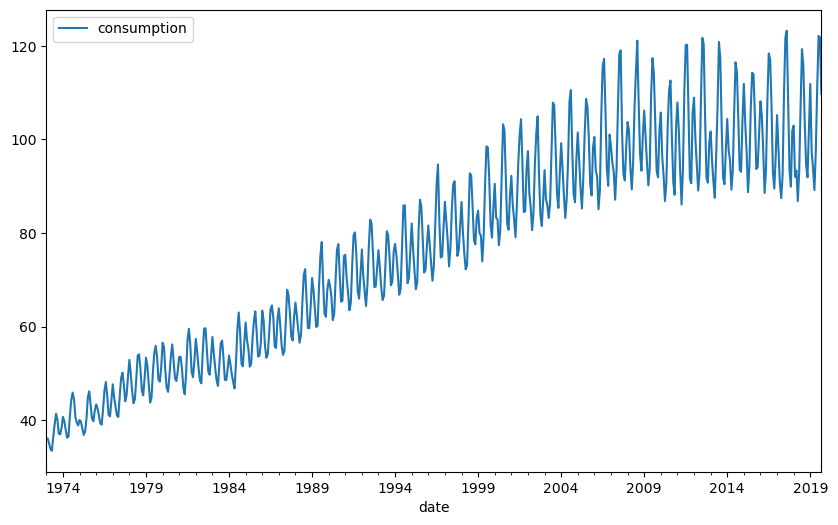

In [11]:
#looking for the patterns in the data 

data.plot()


In [12]:
#checking for missing values/outliers 
pd.pivot_table(data = data,index=data.index.year, columns=data.index.month, values = 'consumption')

date,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
1973,35.9728,36.1334,35.0625,33.8416,33.5107,36.4823,39.1412,41.4137,40.1639,37.1133,37.0248,38.4341
1974,40.7455,39.8340,37.9408,36.3004,36.5293,40.8899,44.3563,45.9240,44.4555,40.6417,39.4901,38.9068
1975,40.0956,39.6944,38.3040,36.8939,37.5668,40.3832,44.9671,46.1853,43.3001,40.3836,39.8092,42.0597
1976,43.4099,42.5826,40.9244,39.3533,39.0766,42.4851,46.3693,48.1945,45.1688,41.1880,40.8431,44.1468
1977,47.6892,44.8505,42.8557,41.0177,40.7201,45.0610,48.9685,50.1898,47.5982,44.0684,45.4267,49.3447
1978,52.9153,49.9488,46.1749,43.6652,44.5402,48.9480,53.8292,54.1182,50.9980,46.3711,45.3267,49.0027
1979,53.3617,51.6279,47.8264,43.7935,44.8591,50.3292,54.3579,55.9197,53.5776,48.7261,48.2585,51.3008
1980,56.5838,55.6802,50.4428,46.8693,46.0886,49.7595,53.8273,56.2272,52.5737,48.8947,48.4081,50.6659
1981,53.5867,53.5461,51.0708,46.9172,45.5795,50.0235,57.1384,59.5376,56.1935,50.3249,49.2234,52.8176


<Axes: >

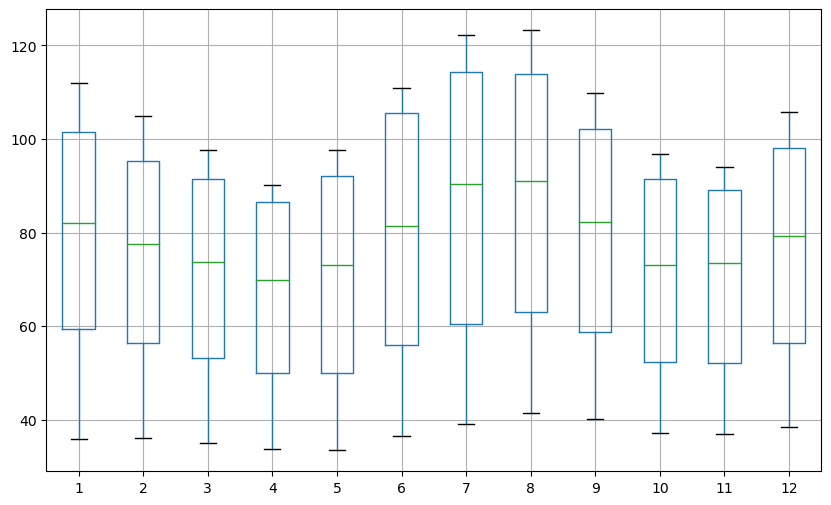

In [13]:
# plot for outliers
pd.pivot_table(data = data,index=data.index.year, columns=data.index.month, values = 'consumption').boxplot()

<Axes: xlabel='date'>

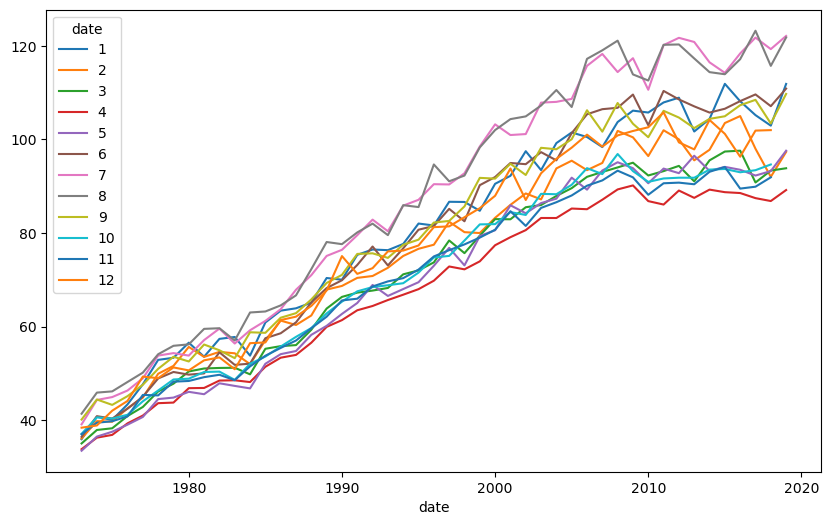

In [14]:
#checking for trend
pd.pivot_table(data = data,index=data.index.year, columns=data.index.month, values = 'consumption').plot()

<Axes: xlabel='date'>

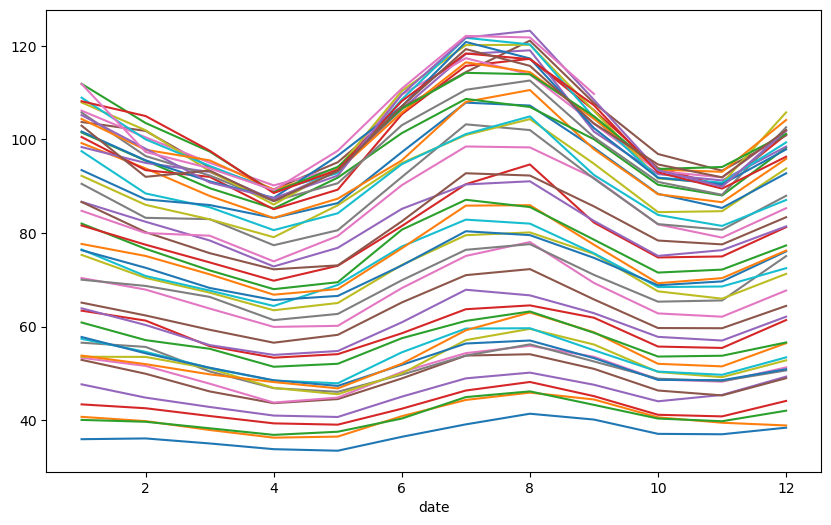

In [15]:
# plot to check seasonality 
pd.pivot_table(data = data,index=data.index.year, columns=data.index.month, values = 'consumption').T.plot(legend=None)

Observations
- the data is till september, the null values are for the unavailable data   
- ts have both trend and seasonality 
- the trend is in upward direction 
- the seasonality shows that the demand decrease in first 3, from april to may ,july to agust and october to november the    demand is somwhat constand 
- from may to july and in november there is increase in demand 

In [16]:
data

,consumption
date,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107
...,...
2019-05-01,97.5860
2019-06-01,110.8580
2019-07-01,122.1014


## Time Series Decomposition  


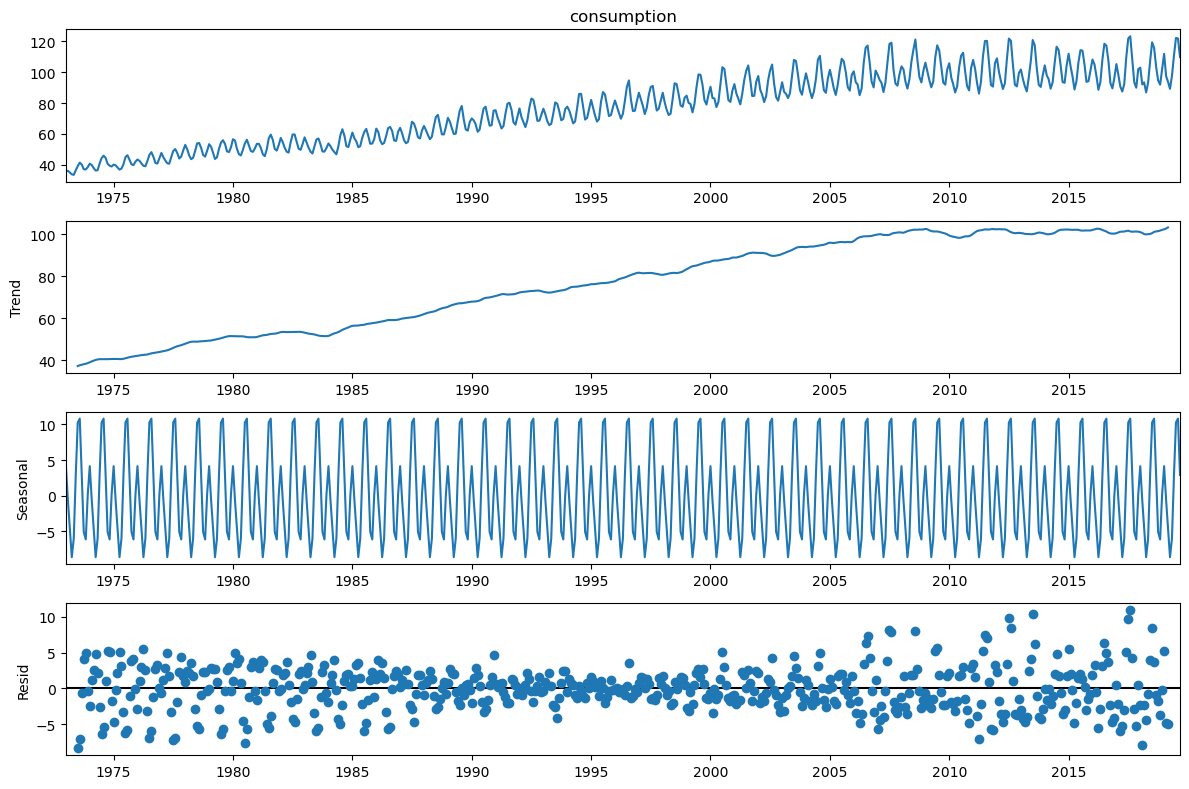

In [17]:
#Additive decomposition

rcParams['figure.figsize'] = 12,8
ad_decomposition = seasonal_decompose(data['consumption'],model = 'additive')
fig = ad_decomposition.plot()
plt.show()

In [18]:
additive_decomposed_data = pd.concat([ad_decomposition.trend, ad_decomposition.seasonal, ad_decomposition.resid, ad_decomposition.observed],axis=1)
additive_decomposed_data.columns = ['Trend', 'SI', "Irregular", "Actual"]
additive_decomposed_data.dropna()

,Trend,SI,Irregular,Actual
date,,,,
1973-07-01,37.223388,10.277826,-8.360014,39.1412
1973-08-01,37.576442,10.828421,-6.991163,41.4137
1973-09-01,37.850562,2.891998,-0.578660,40.1639
1973-10-01,38.072942,-5.105992,4.146351,37.1133
1973-11-01,38.301167,-6.171314,4.894947,37.0248
...,...,...,...,...
2018-11-01,101.805712,-6.171314,-3.726499,91.9079
2018-12-01,102.143504,0.109021,-0.264225,101.9883
2019-01-01,102.417300,4.135755,5.298945,111.8520


In [19]:
#validating the additive decomposition
37.223388 + 10.277826 -8.360014

39.1412

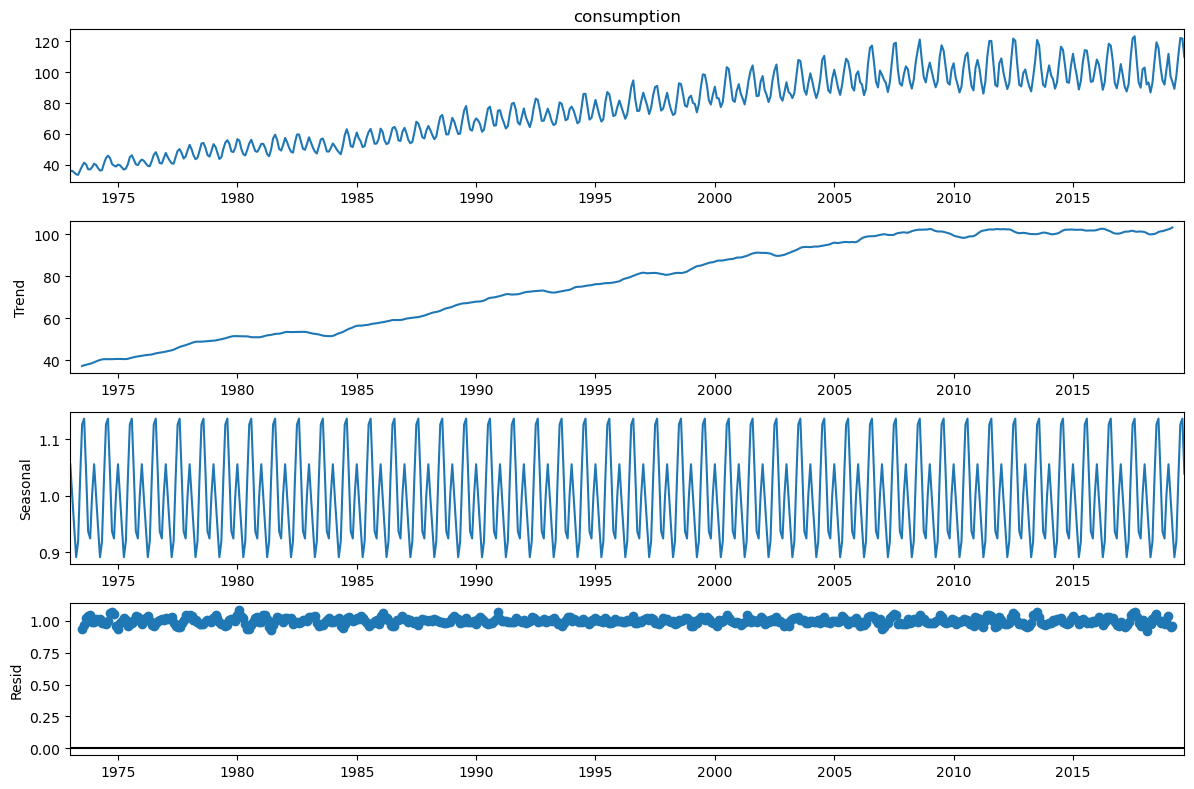

In [20]:
#Multiplicative decomposition

rcParams['figure.figsize'] = 12,8
decomposition = seasonal_decompose(data['consumption'],model = 'multiplicative')
fig = decomposition.plot()
plt.show()

In [21]:
decompose_data = pd.concat([decomposition.trend, decomposition.seasonal, decomposition.resid, decomposition.observed],axis=1)
decompose_data.columns = ['Trend', 'SI', "Irregular", "Actual"]

In [22]:
decompose_data.dropna()

,Trend,SI,Irregular,Actual
date,,,,
1973-07-01,37.223388,1.125749,0.934064,39.1412
1973-08-01,37.576442,1.136105,0.970085,41.4137
1973-09-01,37.850562,1.038776,1.021507,40.1639
1973-10-01,38.072942,0.936702,1.040667,37.1133
1973-11-01,38.301167,0.924028,1.046154,37.0248
...,...,...,...,...
2018-11-01,101.805712,0.924028,0.977002,91.9079
2018-12-01,102.143504,1.001358,0.997126,101.9883
2019-01-01,102.417300,1.055358,1.034834,111.8520


In [23]:
# validating the multiplicative decomposition 
37.223388 * 1.125749 * 0.934064

39.14119702592594

## Build and evaluate time series forecast 

#### spliting the data in to train and test 

In [24]:
train = data[:'2017-09-01']
test = data['2017-10-01':]

In [25]:
data.tail(25)

,consumption
date,
2017-09-01,108.4514
2017-10-01,93.4264
2017-11-01,89.9026
2017-12-01,101.8836
2018-01-01,102.9398
2018-02-01,92.0095
2018-03-01,93.3526
2018-04-01,86.8386
2018-05-01,93.2361


### Exponential Smothening 
<br>Simple exponential smoothing (Captures - Only Level)
<br>Holt's exponential smoothing (Level+Trend)
<br>Holt's Winter exponential smoothing (Level+Trend+Seasonality)

#### Single Exponential smothening 

In [26]:
single = SimpleExpSmoothing(train['consumption'])
# Fit the model with alpha = 0.2 
# optimized = False means, we are explicitly definign the smoothing_level.
# optimized = True means - Automitacially it will define a smoothing_level based on RMSE

In [27]:
single_model_fit = single.fit(smoothing_level= 0.1,optimized = False )
single_model_fit.params

{'smoothing_level': 0.1,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 35.9728,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [28]:
s_f_cast = single_model_fit.forecast(24)

observations
- does not capture any seasonality
- most recent observations gets higher weightage 

In [29]:
#rmse
ses_rmse = np.sqrt(mean_squared_error(test['consumption'],s_f_cast))
ses_rmse

10.852068570457384

In [30]:
#rmspe
ses_rmspe = np.sqrt(np.mean(((test['consumption'] - s_f_cast) / test['consumption']) ** 2))
ses_rmspe

0.10879621429071994

In [31]:
#mape
ses_mape  = mean_absolute_percentage_error(test['consumption'],s_f_cast)
ses_mape

0.09526072193438068

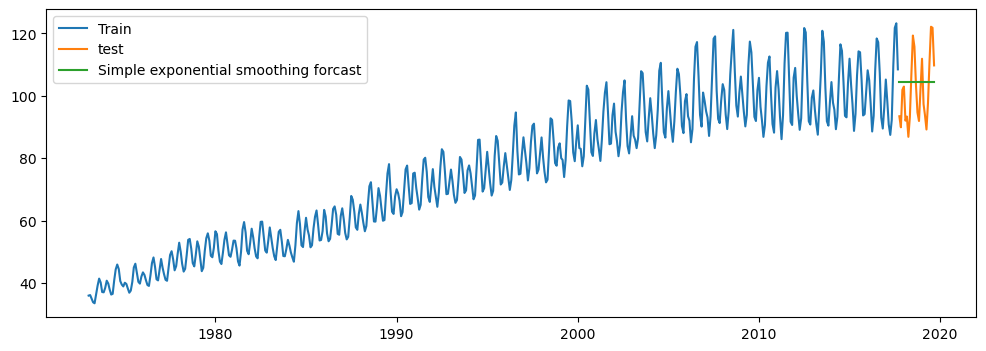

In [32]:
plt.figure(figsize=(12,4))
plt.plot(train['consumption'], label='Train')
plt.plot(test['consumption'], label='test')
plt.plot(s_f_cast, label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

#### Holt's -Winters's  Exponential Smoothing method / Triple Exponential Smothening 

In [33]:
from sklearn.metrics import mean_absolute_error

def auto_hwm(timeseries, val_split_date, alpha=[None], beta=[None], gamma=[None], 
              trend=None, seasonal=None, periods=None, verbose=False):

    best_params = []
    actual = timeseries[val_split_date:]

    print('Evaluating Exponential Smoothing model for', len(alpha) * len(beta) * len(gamma), 'fits\n')

    for a in alpha:
        for b in beta:
            for g in gamma:

                    if(verbose == True):
                        print('Checking for', {'alpha': a, 'beta': b, 'gamma': g})

                    model = ExponentialSmoothing(timeseries, trend=trend, seasonal=seasonal, seasonal_periods=periods)
                    model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
                    f_cast = model.predict(model.params, start=actual.index[0])
                    score = np.where(np.float64(mean_absolute_error(actual, f_cast)/actual).mean()>0,np.float64(mean_absolute_error(actual, f_cast)/actual).mean(),0)

                    best_params.append({'alpha': a, 'beta': b, 'gamma': g, 'mae': score})

    return min(best_params, key=lambda x: x['mae'])

In [34]:
#array for alpha,beta, gamma
alpha = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
beta = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
gamma =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [35]:
auto_hwm(data ,val_split_date='2017-09-01', alpha=alpha, beta=beta, gamma=gamma, 
              trend='additive', seasonal='additive', periods=12, verbose=True)

Evaluating Exponential Smoothing model for 729 fits

Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.8}
Checking for

{'alpha': 0.2, 'beta': 0.1, 'gamma': 0.2, 'mae': array(0.02145328)}

In [36]:
#model implementation 
ets_model_add = ExponentialSmoothing(train, trend='additive', seasonal='additive', seasonal_periods=12).fit(smoothing_level=0.2, smoothing_slope=0.1, smoothing_seasonal=0.2)

In [37]:
#model summary
print(ets_model_add.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:              consumption   No. Observations:                  537
Model:             ExponentialSmoothing   SSE                           2468.422
Optimized:                         True   AIC                            851.106
Trend:                         Additive   BIC                            919.681
Seasonal:                      Additive   AICC                           852.426
Seasonal Periods:                    12   Date:                 Wed, 24 Jan 2024
Box-Cox:                          False   Time:                         04:00:04
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.2000000                alpha                False
smoothing_trend          

In [38]:
ets_add_fcast = ets_model_add.forecast(24)

In [39]:
#rmse
ets_add_rmse = np.sqrt(mean_squared_error(test['consumption'],ets_add_fcast))
ets_add_rmse

4.781039081891836

In [40]:
#rmspe
ets_add_rmspe = np.sqrt(np.mean(((test['consumption'] - ets_add_fcast) / test['consumption']) ** 2))
ets_add_rmspe

0.04922545434544037

In [41]:
#mape
ets_add_mape  = mean_absolute_percentage_error(test['consumption'],ets_add_fcast)
ets_add_mape

0.04205648170620715

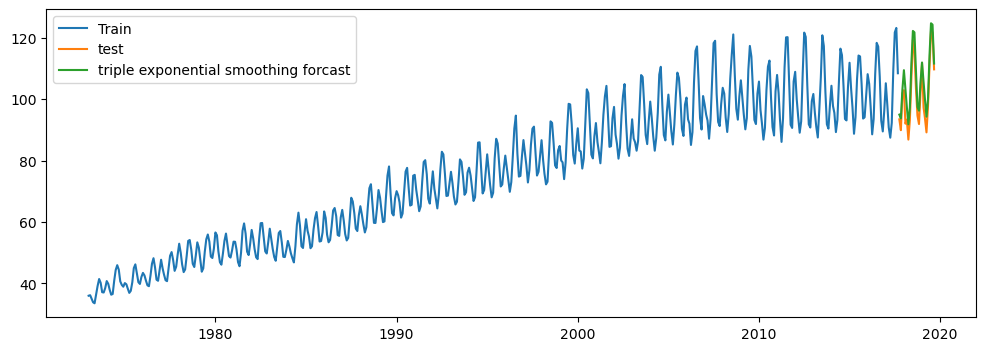

In [42]:
plt.figure(figsize=(12,4))
plt.plot(train['consumption'], label='Train')
plt.plot(test['consumption'], label='test')
plt.plot(ets_add_fcast, label='triple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

### Time series Forecasting -II

#### Stationary vs Non-stationary Time Series

<Axes: xlabel='date'>

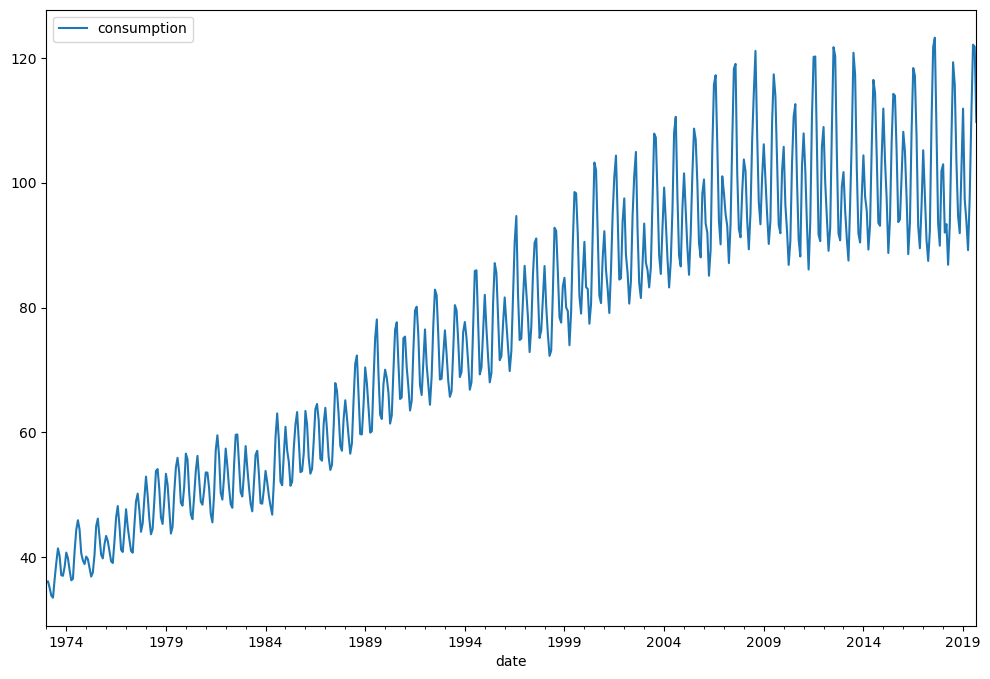

In [43]:
#visualiy checking the sattionarity
data.plot()

#### Augmented Dickey-Fuller (ADF) 
<br>Null Hypothesis (H0): The series is not stationary
<br>p-val > 0.05
<br>Alternate Hypothesis (H1): The series is stationary
<br>p-val <= 0.05

In [44]:
#adfuller test without any transformation or diffrencing
adf_test = adfuller(data['consumption'])
adf_test

(-1.7405933729832284,
 0.41032816044687603,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2295.409663118043)

In [45]:
print('ADF stats: %f' % adf_test[0])
print('p-value: %f' %adf_test[1])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])

ADF stats: -1.740593
p-value: 0.410328
Critical value @ 0.05: -2.87


#### converting non statioray to stationary

<b>Diffrencing 
    
<br>Differencing is performed by subtracting the previous observation from the current observation.
<br>It removes trend and seasonality from time series 

In [46]:
#using diffrencing
adf_test = adfuller(data['consumption'].diff().dropna())
adf_test

(-7.941665363981172,
 3.3013438021516752e-12,
 14,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2292.555416618966)

#### Logrithmic transformation

In [64]:
adf_test = adfuller(np.log(data['consumption']))
adf_test

(-3.001866678891593,
 0.03472044330065344,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 -2515.6635118596973)

In [67]:
diff_data = data['consumption'].diff().dropna()

<Axes: xlabel='date'>

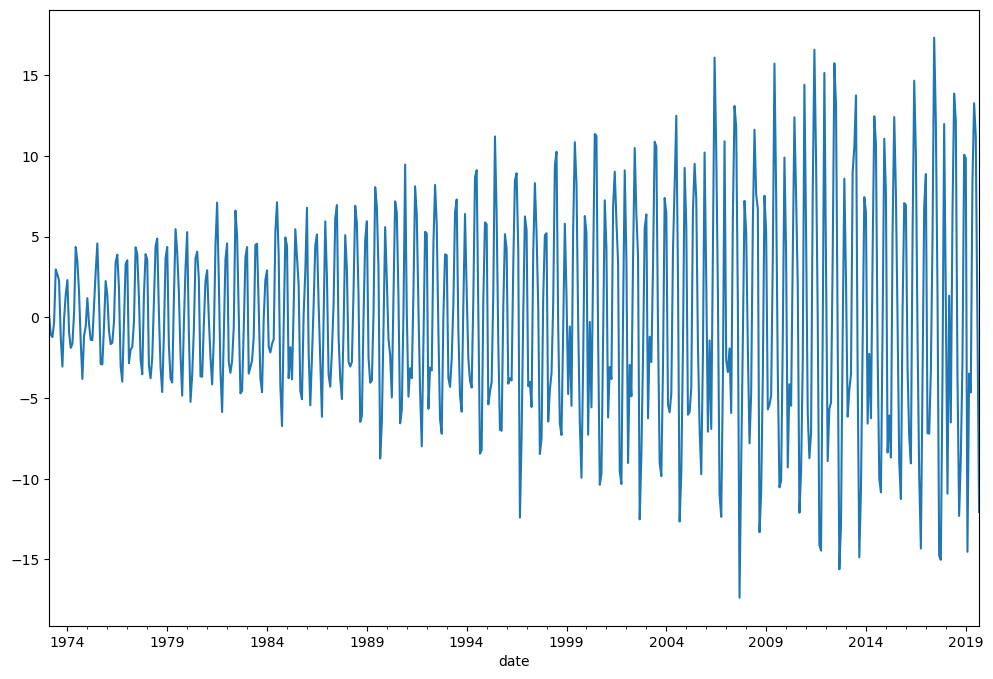

In [69]:
diff_data.plot()
#ln_data.plot()

### Autocorrelation 

#### Autocorrelation function (ACF)

Autocorrelation function captures both direct and indirect relationship with its lagged values.
- helps to understand if there is seasonal pattern ? 
- is the series stationary 
- helps to find the value of q

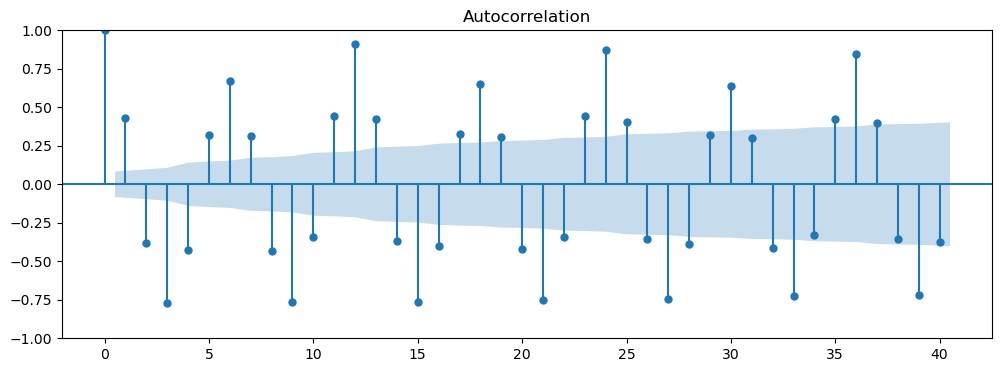

In [49]:
#ACF

plt.figure(figsize=(12,4))
plot_acf(diff_data, ax=plt.gca(), lags=40)
plt.show()

#### Partial  Autocorrelation function (PACF)
- it captures only dirrect relations 
- helps to find the value of p

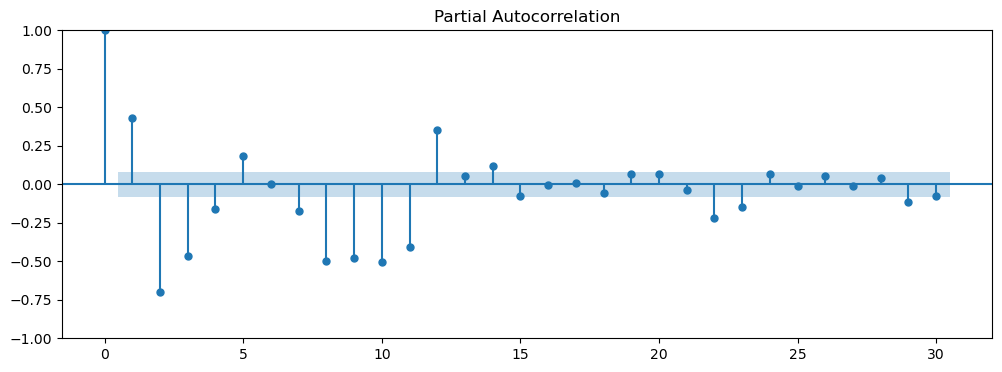

In [50]:

plt.figure(figsize=(12,4))
plot_pacf(diff_data, ax=plt.gca(), lags=30)
plt.show()

#### splitting the data 

In [51]:
train =diff_data[:'2017-09-01']
test = diff_data['2017-10-01':]

In [52]:
train

date
1973-02-01     0.1606
1973-03-01    -1.0709
1973-04-01    -1.2209
1973-05-01    -0.3309
1973-06-01     2.9716
               ...   
2017-05-01     4.8217
2017-06-01    17.3293
2017-07-01    12.1374
2017-08-01     1.4685
2017-09-01   -14.7649
Name: consumption, Length: 536, dtype: float64

In [53]:
model = sm.tsa.statespace.SARIMAX(train, order = (1,1,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

In [54]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        consumption   No. Observations:                  536
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1055.381
Date:                            Wed, 24 Jan 2024   AIC                           2120.763
Time:                                    04:00:06   BIC                           2142.042
Sample:                                02-01-1973   HQIC                          2129.098
                                     - 09-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1252      0.041     -3.034      0.002      -0.206      -0.044
ma.L1         -1.0000     21.805   

In [55]:
sarima_fcast = model.forecast(24)

In [56]:
#rmse
sarima_rmse = np.sqrt(mean_squared_error(test,sarima_fcast))
sarima_rmse

3.2219129394089574

In [57]:
#rmspe
sarima_rmspe = np.sqrt(np.mean(((test- sarima_fcast) / test) ** 2))
sarima_rmspe

1.6365987356873184

In [58]:
#mape
sarima_mape  = mean_absolute_percentage_error(test,sarima_fcast)
sarima_mape

0.7222705551138723

TypeError: 'Figure' object is not subscriptable

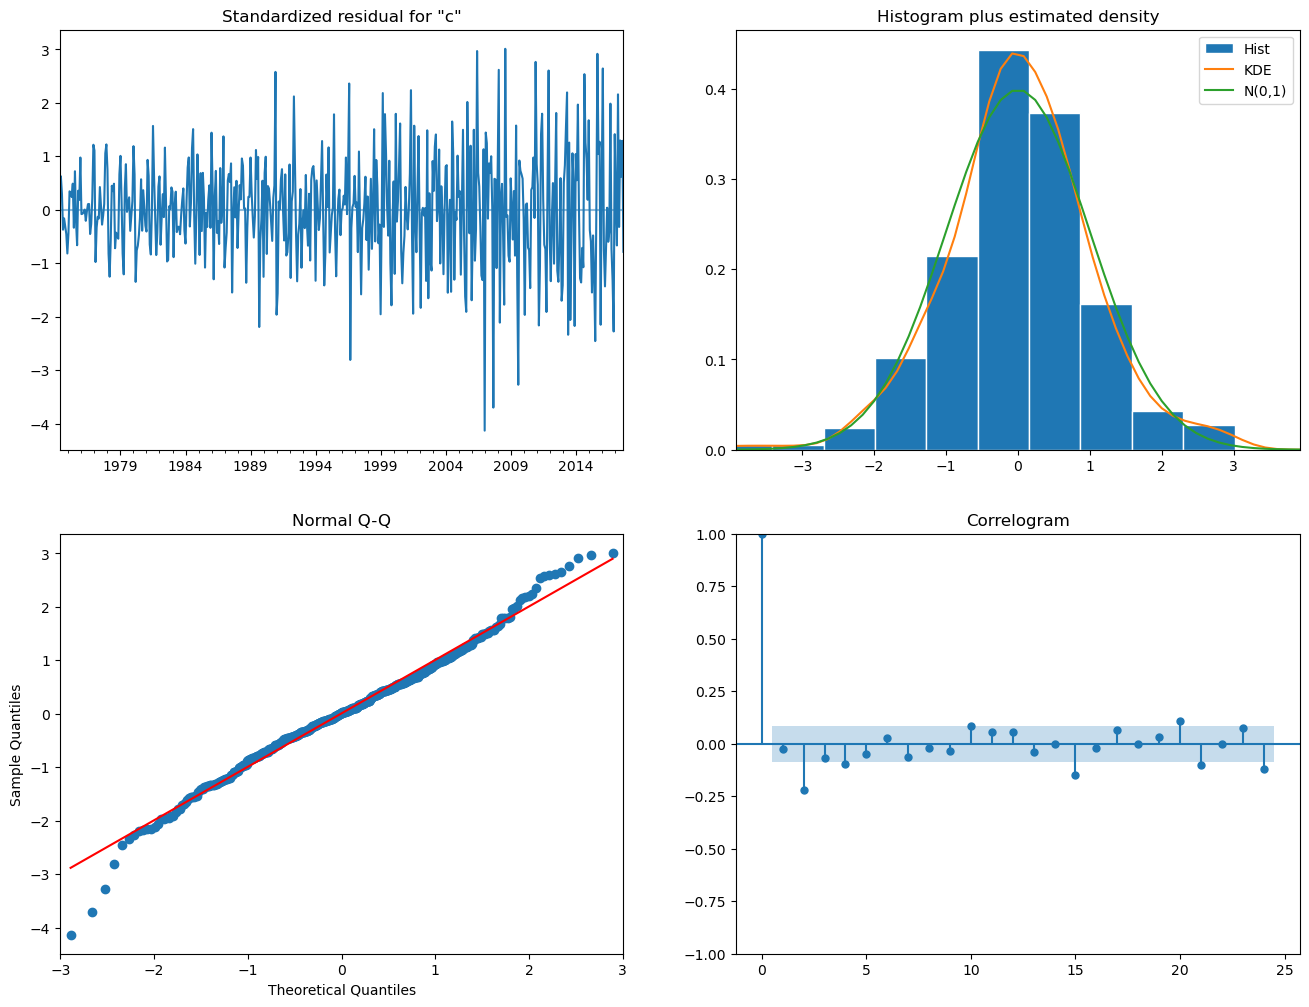

In [63]:

model.plot_diagnostics(lags=24,figsize=[16,12])[0]

### Conclusion 
ETS is working much better than SARIMA for the given time series with lower values of cost functions

#### predictions for next 2 year

In [60]:
ets_model_add = ExponentialSmoothing(data, trend='additive', seasonal='additive', seasonal_periods=12).fit(smoothing_level=0.2, smoothing_slope=0.1, smoothing_seasonal=0.2)
ets_fcast = ets_model_add.forecast(24)

In [61]:
ets_fcast

2019-10-01     96.919198
2019-11-01     95.038647
2019-12-01    105.023650
2020-01-01    111.326876
2020-02-01    102.658011
2020-03-01     99.057099
2020-04-01     93.651494
2020-05-01    100.057960
2020-06-01    114.118172
2020-07-01    125.078467
2020-08-01    124.124556
2020-09-01    111.667759
2020-10-01    100.113759
2020-11-01     98.233209
2020-12-01    108.218212
2021-01-01    114.521438
2021-02-01    105.852573
2021-03-01    102.251661
2021-04-01     96.846056
2021-05-01    103.252522
2021-06-01    117.312734
2021-07-01    128.273029
2021-08-01    127.319117
2021-09-01    114.862321
Freq: MS, dtype: float64

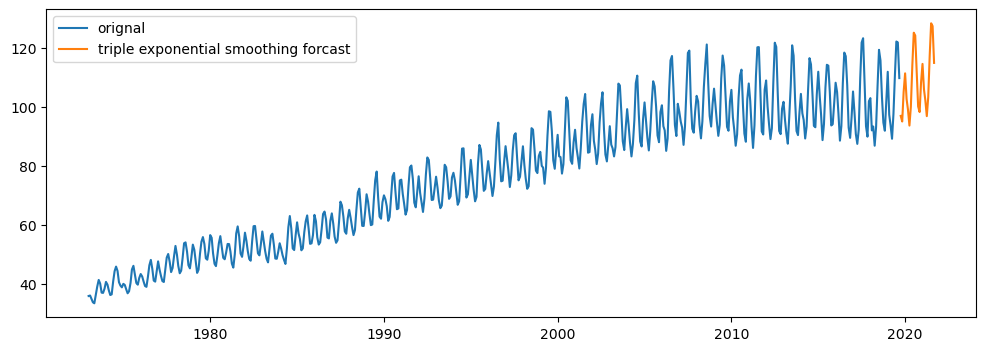

In [62]:
plt.figure(figsize=(12,4))
plt.plot(data, label='orignal')
plt.plot(ets_fcast, label='triple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()